<h1 align="center">Inferential Statistics</h1>
<br/>

<img src="../images/inferential.png" alt="Inferential_Stats" style="width: 400px;"/>
<br/><br/>
Image Source : https://www.kissclipart.com/colorful-dice-clipart-dice-clip-art-1qud0q/

## What are we going to learn today ?

***
- **Introduction to Probability**
    - Basic Probability
        * Basic Probability - Intuition
        * Basic Probability - Easy Rules
    - Conditional Probability
        * Conditional Probability - (1/2)
        * Conditional Probability - (2/2)
        * Conditional Probability - Mathematical Representation
        * Random Variable
        * Simple Probability Distribution
        * Probability Mass Function (p.m.f) & Probability Density Function (p.d.f)
    - Normal Distribution
        * Normal Distribution - (1/4)
        * Normal Distribution - (2/4)
        * Normal Distribution - (3/4)
        * Normal Distribution - (4/4)
        * Normal Distribution & Standard Deviation
        * Concept of Z-score
       
    
- **Introduction to Inference**    
    - Sample Mean & Population Mean
    - Statistical Inference
    - Central Limit Theorem
        * Central Limit Theorem - Definition
        * Central Limit Theorem - Fact !
        * Central Limit Theorem - Important (1/2)
        * Central Limit Theorem - Important (2/2)
    - Confidence Intervals
        * Confidence Intervals - (1/4)
        * Confidence Intervals - (2/4)
        * Confidence Intervals - (3/4)
        * Confidence Intervals - (4/4)
        * Calculating Confidence Intervals - (1/3)
        * Calculating Confidence Intervals - (2/3)
        * Calculating Confidence Intervals - (3/3)
        * Interpretation Of Confidence Interval
    - Hypothesis Testing
        * Why Null Hypothesis ?
        * Alternate Hypothesis
        * P-Value
        * t-test
    - Type I and Type II error
    - Chi-squared Goodness of fit test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from __future__ import division
%matplotlib inline

## Dataset
***

Let's start by loading the dataset. The same house-price prediction dataset used in the previous notebook.

In [2]:
data = pd.read_csv('../data/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h1 align="center">**Introduction to Probability** </h1>
<br/>



## Basic Probability 
***

 - Let's start with a simple example: Say, we flip a fair coin
 
 - Intuitively, there's a 50% chance of getting heads, and a 50% chance of getting tails. This is because there are only two possible outcomes, and each event is equally likely.
 
 - Therefore, we can say that the **Probability** of getting a *Heads* is 0.5. Similarly, Probability of getting a *Tails* is 0.5 
 
 - **Probability can roughly be described as "the percentage chance of an event or sequence of events occurring".**


## Basic Probability - Intuition

Some common terms thrown around are: 

* **Experiment** – are the uncertain situations, which could have multiple outcomes. A coin toss is an experiment.
* **Outcome** is the result of a single trial. So, if head lands, the outcome of or coin toss experiment is “Heads”
* **Event** is one or more outcomes from an experiment. “Tails” is one of the possible events for this experiment.
***
<center><img src="../images/Probability.PNG" alt="Drawing" style="width: 600px;"/></center>
<br/><br/>
Image Source : https://mskomosclass.wordpress.com/2013/02/28/probability-7th-8th/

## Basic Probability - Easy Rules
***
These are a list of some comprehensive rules Probability must follow: 

 - The Probability that an event occurs with certainty is 1
 - The Probability that an event will not occur surely is 0 
 - The Probability of the complement of an event is 1 minus the probability of that event.
 
 - The probability of at least 1 of 2 (or more) things that can not simultaneously occur (mutually exclusive) is the sum of their respective probabilities
 
 - **"Mutually exclusive"** is a statistical term describing two or more events that cannot occur simultaneously. For example, it is impossible to roll a five and a three on a single die at the same time. 

## Basic Probability - Easy Rules
***
 - For any 2 events A & B, the probability that at least one occurs  is the sum of their individual probabilities minus the probability of their intersection. i.e 
<br/><br/>

 $$ P(A\cup B) = P(A) + P(B) - P(A\cap B) $$
 
 **Example** 
 
 - The National Sleep Foundation reports that around 3% of the American population has sleep-breathing issues. They also report that around 10% of the American population has *restless leg syndrome*. Does this imply that 13% of people will have at least one of these problems?

Answer: No, the events can occur simultaneously and so are not mutually exclusive. To elaborate: 
***
<center><img src="../images/probaba.png" alt="Drawing" style="width: 600px;"/></center>

## Coming back to Our Dataset
***
- Let's check out the Probability of picking a house in the Neighborhood - "OldTown"

- This is nothing but: 
   - No. of houses in OldTown/Total no. of houses
   
- Let's go through this in Python

In [3]:
all_houses = data.shape[0]
houses_in_OldTown = data[data['Neighborhood'] == 'OldTown'].shape[0]
print('Probability of picking a house in OldTown: {}'.format(houses_in_OldTown/all_houses))

Probability of picking a house in OldTown: 0.0773972602739726


Thus, the probability of choosing a house at random from the neighborhood of 'OldTown' is *0.077*

## Now what if ...
***

- **GIVEN** that we have the probability of picking a house in  "OldTown" neighborhood, we go a step further and **AGAIN** pick a house from the **SAME** neighborhood ?


- This is nothing but **Conditional Probability !**


- This might sound a little complicated at first but let's break it down by starting with an easy example! 


## Conditional Probability - (1/2)
***
Let's say that we're eating some candies. 

 - There are 10 candies in a bag: 5  green, and 5 blue.
 
 - What is the probability of getting 3 blue candies in a row? 
     - The probability of getting the first blue candy is 5/10, or 1/2. 
     - When we pick a blue candy, though, we remove it from the bag. We're left with **9** candies in total with (5-1 =)4 Blue ones.
     - So the probability of getting another blue is 4/9. 
     - Similarly, the probability of picking a third blue candy is 3/8
     
     


## Conditional Probability - (2/2)
***
- Since we're calculating the probability of picking 1 Blue Candy AND 1 Blue Candy AND 1 Blue Candy

    - Our final probability is 1/2 \* 4/9 \* 3/8, or .0833. So, there is an 8.3% chance of picking three blue candies in a row.
    
    
- **Simple tricks**: Whenever you have to *verbally* say AND (like we just did above), you will want to **MULTIPLY** the probabilities


- Whenever you have to *verbally* say OR, you will want to **ADD** the probabilities. 
    

## One for you !
***

1) What is the probability of picking a green candy OR a blue candy?

2) Consider we have 7 green candies and 5 blue candies. What is the probability of picking (one by one, and without replacing) 2 green candies OR 2 blue candies? 

Answers : 

1) $(5/10)+(5/10)=1$

2) $(7/12)*(6/11)+(5/12)*(4/11)=(62/132)$


## Conditional Probability - Mathematical Representation
***
To summarize, **Conditional probability is the probability of an  event A occurring, given that B has already occurred.**

- It is also denoted by:
***
<center><img src="../images/CP_1.PNG" alt="Drawing" style="width: 400px;"/></center>

- And mathematically, this is given as:
 $$ P(A | B) = \frac{P(A\cap B)}{P(B)} $$


## Conditional Probability - On code !
*** 

 - What would be the probability of first picking a house from the "OldTown" neighborhood and then **AGAIN** picking a house from the **SAME** neighborhood?
 
 - Let's find this out in Python. 


In [4]:
## Enter condtional probability code
(houses_in_OldTown/all_houses) * ((houses_in_OldTown - 1)/(all_houses - 1)) * ((houses_in_OldTown-2)/(all_houses-2)) * ((houses_in_OldTown-3)/(all_houses-3))

3.4149701088772053e-05

## Random Variable
***
- A Variable is value which can change over the course of the experiment 
    - Ex: Ambient temperature
- When there is a probability associated with the values that can be taken by a variable, it is called a **Random Variable** 
    - Ex: number shown on the face of die when it is rolled
- A **discrete variable** is a variable whose value is obtained by counting
    - Examples:  number of students present, number of red marbles in a jar, number of heads when flipping three coins     
- A **continuous variable** is a variable whose value is obtained by measuring
    - Examples: height of students in class, weight of students in class, time it takes to get to school, distance traveled between classes
    

## Some Basic Concepts 
***

 
 - We know what the outcome of an experiment is. 
 
 - Now, depending on the experiment, our outcome can have a range of possible values 
 
 - Each value has a specific, probability assigned to it. These probabilities may or may not be equal to one another
 
 - Now, like always, there is a Statistical Function that describes these values within a given range
 
 - This is nothing but the Probability Distribution of the event
 




## Simple Probability Distribution
***
 -  Lets try and plot a simple probability distribution
 
 - Let a random variable X be the sum of two fair six sided dice thrown
 
 - X can take values (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
 
 - Can you figure our the proability of each value of X? 


## Simple Probability Distribution
***
- We can get any number from 1 to 6 in the first throw. Hence there are 6 possibilities in the first throw. 

- **AND** 6 in the second throw

- Total no. of Combinations = 6\*6 = 36 

Let’s see how:
<br/>

2 {(1,1)}  => 1/36

3 {(1,2),(2,1)} => 2/36

4 {(2,2),(3,1),(1,3)} => 3/36

5 {(1,4),(4,1),(2,3),(3,2)} => 4/36

6 {(3,3),(1,5),(5,1),(2,4),(4,2)} => 5/36

7 {(1,6),(6,1),(2,5),(5,2),(3,4),(4,3)} => 6/36

8 {(2,6),(6,2),(3,5),(5,3),(4,4)} => 5/36

9 {(3,6),(6,3),(5,4),(4,5)} => 4/36

10 {(4,6),(6,4),(5,5)} => 3/36

11 {(5,6),(6,5)} => 2/36

12 {(6,6)} = > 1/36



## Plotting our results
When we plot the values [2,12] on the x-axis vs. the probability of getting each of these values as our Outcome, we get the following: 
***
<center><img src="../images/Prob_dist.png" alt="Drawing" style="width: 500px;"/></center>



## Probability Mass Function (p.m.f)    &    Probability Density Function (p.d.f)
***

- The probability distribution for a discrete random variable is the `probability mass function` for that variable and similarly if our random variable takes continuous values the distribution is called a `probability density function`
<br/><br/> 
- In the previous what we plotted was the Probability Mass Function of a Discrete Random Variable (X which is the sum of two fair dies)
<br/><br/> 
- One of the most common Probability Distribution Functions is the Normal Distribution.
<br/><br/> 
- Let's learn some basic concepts on the Normal Distribution


## Normal Distribution (1/4)
***
 - Data can be "distributed" (spread out) in different ways
***
<center><img src="../images/norm1.png" alt="Drawing" style="width: 500px;"/></center>
<br/><br/>
https://www.tes.com/teaching-resource/introduction-to-normal-distribution-and-z-score-11594404#


## Normal Distribution (2/4)
***
 - But there tend to be many cases where the data gets centered around a value with no bias to the left or right, and it gets close to a "Normal Distribution" like this:
***
<center><img src="../images/norm2.png" alt="Drawing" style="width: 500px;"/></center>
<br/><br/>
https://www.tes.com/teaching-resource/introduction-to-normal-distribution-and-z-score-11594404#


## Normal Distribution (3/4)
***
 - The above is called a "Bell Curve".
 
 - Many things closely follow a Normal Distribution:
    - heights of people
    - size of things produced by machines
    - errors in measurements
    - blood pressure
    - marks on a test


## Normal Distribution (4/4)
***
 - We say that the data is "Normally Distributed" when the distribution has:
    - symmetry about the center 
    - mean = median = mode
    - 50% of values are less than the mean 
    - and 50% greater than the mean
    - The total area under the curve is 1.
<br/><br/>
 - If a Normal Distribution has mean equal to zero and standard deviation equal to one, it is called **Standard Normal Distribution**
 <br/><br/>
 <center><img src="../images/norm3.png" alt="Drawing" style="width: 500px;"/></center>
 <br/><br/>
 Slide 5/30 from Image Source : https://slideplayer.com/slide/12725412/

## Normal Distributions and Standard Deviations
***
 - In the last notebook, we learnt about Standard Deviation and how it's the most commonly used measure of how spread out observations of our data are
 
 - When we calculate the standard deviation we find that (generally):
 
    - 68% of values are within 1 standard deviation	of the mean
    - 95% of values are within 2 standard deviations of the mean
    - 99.7% of values are within 3 standard deviations of the mean

![Normal distribution](../images/normal_distribution_0.jpeg)
<br/><br/>
Image Source : https://en.wikipedia.org/wiki/Normal_distribution

## Let's check the skewness of our data
***
 - Let's plot a graph of SalePrice vs. the Frequency
 

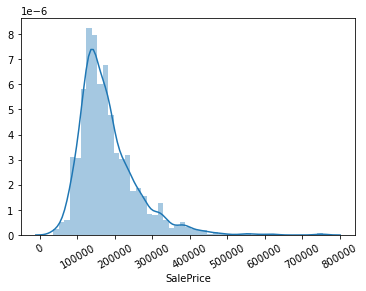

In [5]:
plt.xticks(rotation=30)
sns.distplot(data['SalePrice']);

## Thoughts 
***
The distribution for our target variable aka SalePrice doesn't resemble a normal distribution, it is skewed to the right

 - This makes some sense since we already saw in the last notebook that we had a lot of Outliers on the upper-end of the Price scale
 
 - If you were to remove the outliers, it'd somewhat resemble a Normal Dstribution


## The Concept of Z-score (1/5)
***
 - The number of standard deviations from the mean is also called the "Standard Score", "sigma" or "z-score". 
 

## The Concept of Z-score (2/5)

***
- As usual, let's build our intution with an Example
    - Consider that we're analyzing data of the heights (in meters) of students in a school 
    - The data is normally distributed as shown below:
 ***
<center><img src="../images/norm6.gif" alt="Drawing" style="width: 300px;"/></center>
<br/><br/>
Image Source : http://scaryscientist.blogspot.com/2015/03/normal-distribution.html



## The Concept of Z-score (3/5)
***
 - We can see that the mean = 1.4 meters
 - In that same school one of your friends is 1.85m tall
 - You can see on the bell curve that 1.85m is 3 standard deviations from the mean of 1.4, so:
 - **Your friend's height has a "z-score" of 3.0**
 




## The Concept of Z-score (4/5)
***
 - It is also possible to calculate how many standard deviations 1.85 is from the mean
      - How far is 1.85 from the mean?
      - It is 1.85 - 1.4 = 0.45m from the mean
 
 - Say that the Std. Dev. is pre-calculated and is = 0.15m
 
 - How many standard deviations is it from the mean? The standard deviation is 0.15m, so:

     - z-score = 0.45m / 0.15m = 3 standard deviations



## The Concept of Z-score (5/5)
***
So to convert a value to a Standard Score ("z-score"):

 - first subtract the mean,
 - then divide by the Standard Deviation

And this process is called "Standardizing":
 ***
<center><img src="../images/norm7.svg" alt="Drawing" style="width: 600px;"/></center>


<h1 align="center">**Introduction to Inference** </h1>
<br/>

## Sample mean and Population mean
***
- Let's consider a sample of 500 houses at random from 1460 houses and plot it's mean
- But the mean of these 500 houses can be near or pretty far away from the mean of the 1460 houses calculated earlier.

In [6]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=500) # Sample 500 values
print ("Sample mean:", sample_ages.mean() )                         # Show sample mean
print("Population mean:", data['SalePrice'].mean())  # Show population mean

Sample mean: 177499.802
Population mean: 180921.19589041095


## Note :
***
- We discussed that the Median would be a better measure but for the sake of simplicity of further calculations and concept-building, let's consider the Mean of all houses in the following cases

## Statistical Inference
***
 - Let's try and understand the words **"Sample"** & **"Population"** as these will be used a lot in Statistics
 
 - Again, let's build our intuition with the help of some easy examples 
 
 
 - While analyzing data with statistical thinking, we are often interested in the characteristics of some large population
 

## Statistical Inference
***

- But **collecting data on the entire population may be infeasible**
 
- For example, leading up to U.S. presidential elections it could be very useful to know the political leanings of every single eligible voter, but surveying every voter is not feasible.
      
- Instead, we could poll some subset of the population, such as a thousand registered voters, and use that data to make inferences about the population as a whole.
      

## Statistical Inference
***
 - This *"subset"* of the population is nothing but the **Sample** data 
 
 - We carry out various tests on the Sample to gain insight on the larger population out there! 
 
 - **Therefore Statistical inference is the process of analyzing sample data to gain insight into the population from which the data was collected and to investigate differences between different data samples.**
 
 

## Statistical Inference
***

- In our case, we are primarily concerned with the SalePrice of every house. 
    - Therefore, it's safe to assume that all 1460 house prices as a **Sample** of the data 
    - The Population would be the price of **Every** house in Brooklyn 
    

 - But since we've taken a subset (i.e. 500) of the data from 1460 we can assume that: 
     - The 1460 Houses are the Population for the next few examples 
     - The 500 houses are the Sample

## Some Terminology: Point Estimates
***
Point estimates are estimates of population parameters based on sample data. 

* For instance, if we wanted to know the average age of registered voters in the U.S., we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole.

* The sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. 


## Point Estimates in Our Sample Test 
***
* Our point estimate based on a sample of 500 houses underestimates the true population mean by \$3,400, but it is close! 


* This illustrates an important point: *we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals*

## Terminology - Parameter & Statistic 
***
 - A parameter is a descriptive measure of the population.
    - Example: Population mean, Population variance etc.
 - A statistic is a  descriptive measure of the sample.
    - Example: Sample mean, Sample variance etc.
     ***
<center><img src="../images/parstat.png" alt="Drawing" style="width: 500px;"/></center>


 ***
<center><img src="../images/sample2.png" alt="Drawing" style="width: 500px;"/></center>


## Central Limit Theorem  - Definition 
***
 - The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the `mean` of all samples from the same population will be approximately equal to the `mean` of the population. Furthermore, all of the samples will follow an approximate normal distribution pattern, with all variances being approximately equal to the variance of the population divided by each sample's size.


## Central Limit Theorem  - Fact !
***
- According to the central limit theorem, the mean of a sample of data will be closer to the mean of the overall population in question as the sample size increases, notwithstanding the actual distribution of the data, and whether it is normal or non-normal. As a general rule, **sample sizes equal to or greater than 30** are considered sufficient for the central limit theorem to behold, meaning the distribution of the sample means is fairly normally distributed.


## Central Limit Theorem - Important (1/2)
***
* Many practices in statistics, such as those involving hypothesis testing or confidence intervals, make some assumptions concerning the population that the data was obtained from.

* One assumption that is initially made in a statistics course is that the populations that we work with are normally distributed.


## Central Limit Theorem - Important (2/2)
***

* The assumption that data is from a normal distribution simplifies matters but seems a little unrealistic.

* Just a little work with some real-world data shows that outliers, skewness, multiple peaks and asymmetry show up quite routinely like the one we encountered with `SalePrice` above.

* We can get around the problem of data from a population that is not normal. That is where **Central Limit Theorem** comes in.

* The use of an appropriate sample size and the central limit theorem help us to get around the problem of data from populations that are not normal.
<br/><br/>
* Let's look at the Central Limit Theorem with the help of code in Python.

AttributeError: 'Rectangle' object has no property 'normed'

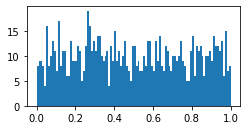

In [7]:
from functools import partial # provides capability to define function with partial arguments

n=np.array([1,2,3,5,10,100, 200]) # number of samples to average over.
N=1000 # number of times samples of size n are taken. Try varying this number.
nobb=101 # number of bin boundaries on plots


exp_mean=3 # mean of exponential distribution
a,b=0.7,0.5 # parameters of beta distribution

dist=[partial(np.random.random),partial(np.random.exponential,exp_mean),partial(np.random.beta,a,b)]
title_names=["Flat", "Exponential (mean=%.1f)" % exp_mean, "Beta (a=%.1f, b=%.1f)" % (a,b)] #title names.
drange=np.array([[0,1],[0,10],[0,1]]) # ranges of the three distributions
means=np.array([0.5,exp_mean,a/(a+b)]) # means of the three distributions
var=np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a+b)**2)]) # variances of the three distributions

binrange=np.array([np.linspace(p,q,nobb) for p,q in drange]) # generates random samples in the specified ranges for the respective distributions.
ln,ld=len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

for i in range(ln): # loop over number of n samples to average over
    for j in range(ld): # loop over the different distributions
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j],normed=True)
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_names[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'y',linewidth=2)     
plt.show()

In the graphs above the yellow curve is the predicted Gaussian distribution from the Central Limit Thereom. Notice that the rate of convergence of the sample mean to the Gaussian depends on the original parent distribution. Also, 

- the mean of the Gaussian distribution is the same as the original parent distribution,
- the width of the Gaussian distribution varies with sample size as $1/\sqrt{n}$.




## Sampling - A Confident one !
***
 - Now we want to test if we take 1000 houses, instead of 500, will those houses contain the Population (1460 Houses) mean too? 
 
 - It may or may not, if yes good else, we'll have to take another sample of 1000. This get's repetitive.
 
 - Thanks to programming, it's got easier to take many samples. But it should contain the Population Mean, majority of the times. 
 
 - This means we want to check the Population mean is contained in our samples majority of times i.e we want the **Confidence Interval** of the mean of our many samples.


## Confidence Intervals  (1/4)
***
 - A Confidence Interval is a range of values we are fairly sure our true value lies in! 
 
     
<center><img src="../images/ci1.gif" alt="Drawing" style="width: 200px;"/></center>

## Confidence Intervals (2/4)
***
 - Let's build our intuition with the help of an example
 
 - Example: Average Height

    - We measure the heights of 40 randomly chosen men, and get a:

            - mean height of 175cm,
            - with a standard deviation of 20cm.


## Confidence Intervals (3/4)
***
 - The 95% Confidence Interval (we will learn how to calculate this later) is:
 ***
 <center><img src="../images/ci2.gif" alt="Drawing" style="width: 200px;"/></center>

## Confidence Intervals (4/4)
***
- This says the true mean of ALL men (if we could measure their heights) is likely to be between 168.8cm and 181.2cm.

- But it might not be!

- The "95%" says that 95% of experiments like we just did will include the true mean, but 5% won't.

- So there is a 1-in-20 (5%) chance that our Confidence Interval does NOT include the true mean.



## Calculating the Confidence Interval (1/3)
***
**Step 1** : Note down the number of samples **n**, and calculate the mean **$\bar{X}$** and standard deviation **s** of those samples:

 - Number of samples: n = 40
 - Mean: $\bar{X}$ = 175
 - Standard Deviation: s = 20


## Calculating the Confidence Interval (2/3)
***
**Step 2** : Decide what Confidence Interval we want. 90%, 95% and 99% are common choices. Then find the "Z" value for that Confidence Interval here:
 ***
 <center><img src="../images/ci3.png" alt="Drawing" style="width: 200px;"/></center>



## Calculating the Confidence Interval (3/3)
***

For 95% the Z value is 1.960

**Step 3**: Use that Z in this formula for the Confidence Interval :

$$ \bar{X} \pm Z\frac{s}{\sqrt{n}}  $$
 
$
\begin{align}
Where :  
\end{align}
$

$
\begin{align}
\bar{X}\thinspace is\thinspace the\thinspace sample\thinspace mean\thinspace 
\end{align}
$

$
\begin{align}
Z\thinspace\thinspace is\thinspace the\thinspace z-score\thinspace chosen\thinspace from\thinspace the\thinspace table\thinspace above\thinspace
\end{align}
$

$
\begin{align}
s\thinspace is\thinspace the\thinspace sample\thinspace standard\thinspace deviation
\end{align}
$

$
\begin{align}
n\thinspace is\thinspace the\thinspace number\thinspace of\thinspace samples\thinspace
\end{align}
$


Thus, we have: 
    
    175 ± 1.960*(20/sqrt(40))
    
    = 175cm ± 6.2cm
    
In other words: from 168.8cm to 181.2cm

 - The value after the ± is called the **margin of error**
 - The **margin of error** in the previous example is 6.20cm

## Interpretation of Confidence Intervals
***
Let's build our intution, again, with the help of an example. This should help explain how to interpret the Confidence Interval

Example: Apple Orchard

 - Are the apples big enough?

 - There are hundreds of apples on the trees, so you randomly choose just 30 and get these results:

    - Mean: 86
    - Standard Deviation: 5


## Interpretation of Confidence Intervals
***
We know:

 - X is the mean = 86
 - Z is the Z-value = 1.960 (from the table above for 95%)
 - s is the standard deviation = 5
 - n is the number of samples = 30
 - 86  ±  1.960	5	 = 86 ± (1.79/√30)


So the true mean (of all the hundreds of apples) is likely to be between 84.21 and 87.79

## Interpretation of Confidence Intervals
***
True Mean

Now imagine we get to pick ALL the apples straight away, and get them ALL measured by the packing machine (this is a luxury not normally found in statistics!)

And the true mean turns out to be 84.9

Let's lay all the apples on the ground from smallest to largest:

 - Each apple is a green dot, except our samples which are blue
 ***
 <center><img src="../images/ci5.gif" alt="Drawing" style="width: 200px;"/></center> 


## Interpretation of Confidence Intervals
***
 - Our result was not exact ... it is random after all ... but the true mean is inside our confidence interval of 86 ± 1.79 (in other words 84.21 to 87.79) 
 
 - But the true mean might not be inside the confidence interval but 95% of the time it will!
 
  ### 95% of all "95% Confidence Intervals" will include the true mean


## Interpretation of Confidence Intervals 
***
Maybe we had this sample, with a mean of 83.5 and a Standard Deviation of 3.5:

 - That does not include the true mean. Expect that to happen 5% of the time for a 95% confidence interval.

 - So how do we know if the sample we took is one of the "lucky" 95% or the unlucky 5%? Unless we get to measure the whole population like above we simply don't know.
 
 - *This is the risk in sampling, we might have a bad sample.* (Important!) 
 


 - Let's experiment to see whether the houses do have the True Mean within the sample! 

 - Let's get right into it!

In [ ]:
import scipy.stats as stats
import math

np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= data['SalePrice'], size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*

print("z-critical value: ",z_critical)              # Check the z-critical value                     

pop_stdev = data['SalePrice'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['SalePrice'].mean()))

* Notice that the true mean is contained in our interval.
* A confidence interval of 95% would mean that if we take many samples and create confidence intervals for each of them, 95% of our samples' confidence intervals will contain the true population mean.


* Now, let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean

* Let's do this for 25 trials! 

In [ ]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = data['SalePrice'].std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

In [ ]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red");

### Notice that in the plot above, all but one of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the times.

 - Now let's check whether the prices of the houses are different (on an average) when compared to those in other neighborhoods. 
 
 - For this let's conjure up what is famously known as a "Hypothesis" 



## Hypothesis 
***
A statement that might be true, can then be tested.

Example: Sam has a hypothesis that "large dogs are better at catching tennis balls than small dogs". We can test that hypothesis by having hundreds of different sized dogs try to catch tennis balls.

- The beauty of these Hypotheses are that they can be TESTED! 

## Hypothesis Testing 
***
- Statistical hypothesis tests are based on a statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing. 
 
 - Therefore, in our case the Null Hypothesis would be:
     - "The Mean of House Prices in OldTown is **not different** from the houses of other neighborhoods"

## Why Null Hypothesis? 
***
 - The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true or not, given a sample data.
 - If there is little evidence against the null hypothesis given the data, you accept the null hypothesis.
 - If the null hypothesis is unlikely given the data, you might reject the null in favor of the alternative hypothesis: that something interesting is going on.

## Alternative Hypothesis
***
 - This is nothing but the question you ask which kind of "opposes" the Null Hypothesis
 
 - Therefore, in our case the Alternative Hypothesis is that:
     - "The Mean of House Prices in OldTown **IS** different from the houses of other neighborhoods
     
 - Only 1 Hypothesis can be right
 
 - In hypothesis testing we test a sample, with the goal of accepting or rejecting a null hypothesis which is our assumption or the default position. The test tells us whether or not our primary hypothesis is true.
 

## Important Note !
***

### The null hypothesis is assumed true and statistical evidence is required to reject it in favor of a research or alternative hypothesis

 - We require a standard on the available evidence to reject the null hypothesis (convict)


If we set a low standard
, then we would increase the percentage of innocent people convicted
; however we would also increase the percentage of guilty people convicted
(correctly rejecting the null)


If we set a high standard, then we increase the the percentage of innocent people let free
 while we would also increase the percentage of guilty people let free
(type II errors)

 - Once you have the null and alternative hypothesis in hand, you choose a significance level (often denoted by the Greek letter α). The significance level is a probability threshold that determines when you reject the null hypothesis.
 
 - After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. 
 
 - This probability of seeing a result as extreme or more extreme than the one observed is known as the *p-value*.


## Interpretation of p-value - EASY! (1/4)
***
- The p-value is really not as complicated as people make it sound

- So now say that we have put a significance (α) = 0.05
    - This means that if we see a p-value of lesser than 0.05, we reject our Null and accept the Alternative to be true 
    

## Interpretation of p-value - EASY! (2/4)
***

- What you have to understand is the data from your Null hypothesis follows a distribution (Normally distributed) 
     - Just imagine 1 bell curve of the data from the Null Hypothesis
     - Now imagine another bell curve which hypothetically defines your Alternative Hypothesis
     
     See below: 
        
 ***
 <center><img src="../images/pval1.png" alt="Drawing" style="width: 350px;"/></center> 

## Interpretation of p-value - EASY! (3/4)
***
 - So what the p-value denotes is the Probability of finding the Alternative Hypothesis data in the Null Hypothesis data (bell curve 1!!) 
 
 - If it is lesser than 0.05(our threshold) then we reject it
 

## Interpretation of p-value - EASY! (4/4)
***
Why reject it though? 

 - BECAUSE OUR ALTERNATIVE HYPOTHESIS DATA IS REAL! NO ONE MADE IT UP! IT IS LEGIT DATA THAT IS OBSERVED AND NOT JUST FAKE! 
 - So if it is real, we can say that such data isn't really described by the Null Hypothesis (Bell Curve 1) therefore the Null must be rejected as being TRUE! 
 
 - It now makes sense! P-values are cool again 

## Are house prices in OldTown really different from the House Prices of Other Neighborhoods? 
***
 - Let's find out 

In [ ]:
from statsmodels.stats.weightstats import ztest
z_statistic, p_value = ztest(x1=data[data['Neighborhood'] == 'OldTown']['SalePrice'], value=data['SalePrice'].mean())
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{}'.format(p_value))

## Summary of the p-value
***
* When performing a hypothesis test, the p-value is the probability of giving  more extreme outcome given the null-hypothesis is true.

* We see that the p-value is close to zero i.e., the probability of getting the given distribution of houseprices in OldTown under the assumption that its mean is the same as the mean of all house prices.
* So what can we infer from the p-value of our test? What should be the p-value beyond which we reject the null hypothesis.
* The p-value below which we reject our hypothesis depends on our **significance level** $\alpha$
* For a 95% signifigance level we reject our null hypothesis if p-value is below 0.05
* In this case we can reject the null hypothesis at 95% significance. 

## Another way to test: Gosset's (Student's) t-test
***
* The T-test is a statistical test used to determine whether a numeric data sample differs significantly from the population or whether two samples differ from one another.
* A z-test assumes a sample size >30 to work, but what if our sample is less than 30?
* A t-test solves this problem and gives us a way to do a hypothesis test on a smaller sample.


- Now, let's  also see if house prices in `Stone Brook` neighborhood are different from the houses in the rest of the neighborhoods.

In [ ]:
print('No of houses in Stone Brook: {}'\
      .format(data['Neighborhood'].value_counts()['StoneBr']))

Lets do a t-test to test our hypothesis

In [ ]:
stats.ttest_1samp(a= data[data['Neighborhood'] == 'StoneBr']['SalePrice'],               # Sample data
                 popmean= data['SalePrice'].mean())  # Pop mean

* The p-value in this case again is low and we can reject our null hypothesis

## Type I and Type II Error
***
* If we again think of hypothesis test as a criminal trial then it makes sense to frame the verdict in terms of null and alternate hypothesis:


    * Null Hypothesis: Defendant is innocent
    * Alternate Hypothesis: Defendant is guilty

## Type I and Type II Error

***
* What type of error is being committed in the following circumstances?
    * Declaring the defendant guilty when they are actually innocent?
    * Declaring the defendant innocent when they are actually guilty?
    
* The first one is a type I error also known as a "false positive" or "false hit".
* The second one is a type II error also known as a "false negative" or "miss". 

## Type 1 Error 
***
Type I error describes a situation where you reject the null hypothesis when it is actually true. 

This type of error is also known as a false positive or false hit.

The type 1 error rate is equal to the significance level α, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.

## Type 2 error
***
Type II error describes a situation where you fail to reject the null hypothesis when it is actually false. 

Type II error is also known as a false negative or miss. The higher your confidence level, the more likely you are to make a type II error.

### Chi-Squared Goodness-Of-Fit Test (1/2)
***
A chi-squared goodness of fit tests whether the distribution of sample categorical data matches an expected distribution. 

* For example, you could use a chi-squared goodness-of-fit test to check whether the race demographics of members at your church or school match that of the entire population of your country or whether the computer browser preferences of your friends match those of Internet uses as a whole.

When working with categorical data the values the observations themselves aren't of much use for statistical testing because categories like "male", "female," and "other" have no mathematical meaning. 

### Chi-Squared Goodness-Of-Fit Test (2/2)
***
Tests dealing with categorical variables are based on variable counts instead of the actual value of the variables themselves.

Let's generate some fake demographic data for U.S. and Minnesota and walk through the chi-square goodness of fit test to check whether they are different:

In [ ]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)          

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

Chi-squared tests are based on the so-called chi-squared statistic. You calculate the chi-squared statistic with the following formula:

>$sum((observed−expected)^2/expected)$


In the formula, observed is the actual observed count for each category and expected is the expected count based on the distribution of the population for the corresponding category. 

Let's calculate the chi-squared statistic for our data to illustrate:

In [ ]:
observed = minnesota_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(minnesota)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

**Note:** The chi-squared test assumes none of the expected counts are less than 5.

Similar to the t-test where we compared the t-test statistic to a critical value based on the t-distribution to determine whether the result is significant, in the chi-square test we compare the chi-square test statistic to a critical value based on the chi-square distribution. 

The scipy library shorthand for the chi-square distribution is chi2. 

Let's use this knowledge to find the critical value for 95% confidence level and check the p-value of our result:

In [ ]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)

**Note:** we are only interested in the right tail of the chi-square distribution. Read more on this [here](https://en.wikipedia.org/wiki/Chi-squared_distribution).

Since our chi-squared statistic exceeds the critical value, we'd reject the null hypothesis that the two distributions are the same.

You can carry out a chi-squared goodness-of-fit test automatically using the scipy function scipy.stats.chisquare():

In [ ]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

The test results agree with the values we calculated above.



## Chi-Squared Test of Independence
***
Independence is a key concept in probability that describes a situation where knowing the value of one variable tells you nothing about the value of another. 

For instance, the month you were born probably doesn't tell you anything which web browser you use, so we'd expect birth month and browser preference to be independent. 

On the other hand, your month of birth might be related to whether you excelled at sports in school, so month of birth and sports performance might not be independent.

The chi-squared test of independence tests whether two categorical variables are independent. 



## Effect of `LandContour` on `SalePrice`
***
Let's test if knowing `LandContour` which is the overall flatness of the property tells us anything about the price

 -  For this let's divide the `SalePrice` in three buckets - **High, Medium, Low**

In [ ]:
import scipy.stats as sp
def compute_freq_chi2(x,y):
    """This function will compute frequency table of x an y
    Pandas Series, and use the table to feed for the contigency table
    
    Parameters:
    -------
    x,y : Pandas Series, must be same shape for frequency table
    
    Return:
    -------
    None. But prints out frequency table, chi2 test statistic, and 
    p-value
    """
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2,pval,dof,expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

In [ ]:
price = pd.qcut(data['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(data.LandContour, price)

* The low p-value tells us that the two variables aren't independent and knowing the `LandContour` of a house does tells us something about its `SalePrice`.
* The frequency distribution reflects this.
* Houses that are Near Flat/Level(Lvl) have an equal distribution of `SalePrice`.
* On the other hand houses that are at a Hillside i.e., Significant slope from side to side (HLS) have almost thrice as much houses with low price than high prices.

<br/><br/>